In [1]:
from fyp_code import esn, rcutil
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams["figure.figsize"] = [9,4]
plt.rcParams['figure.dpi'] = 150

In [2]:
# initialise input data
data_mg = rcutil.data_mg()
data_sin1 = rcutil.data_sin(order=1)
data_sin2 = rcutil.data_sin(order=2)
data_sin3 = rcutil.data_sin(order=3)

In [3]:
rhos_mg = np.linspace(0.7,1.3,30)
alphas_mg = np.linspace(0.3,0.9,30)
betas_mg = np.logspace(-8,-2,30)

In [4]:
o = esn.Optimiser(data_mg)

In [5]:
optr, rnmse = o.opt_rho(rhos_mg)

OPTIMISING RHO...
    PROCESSING... 10%
    PROCESSING... 20%
    PROCESSING... 30%
    PROCESSING... 40%
    PROCESSING... 50%
    PROCESSING... 60%
    PROCESSING... 70%
    PROCESSING... 80%
    PROCESSING... 90%
    PROCESSING... 100%
OPTIMAL RHO: 0.7413793103448275


In [6]:
opta, anmse = o.opt_alpha(alphas_mg)

OPTIMISING ALPHA...
    PROCESSING... 10%
    PROCESSING... 20%
    PROCESSING... 30%
    PROCESSING... 40%
    PROCESSING... 50%
    PROCESSING... 60%
    PROCESSING... 70%
    PROCESSING... 80%
    PROCESSING... 90%
    PROCESSING... 100%
OPTIMAL ALPHA: 0.4241379310344828


In [7]:
optb, bnmse = o.opt_beta(betas_mg)

OPTIMISING BETA...
    PROCESSING... 10%
    PROCESSING... 20%
    PROCESSING... 30%
    PROCESSING... 40%
    PROCESSING... 50%
    PROCESSING... 60%
    PROCESSING... 70%
    PROCESSING... 80%
    PROCESSING... 90%
    PROCESSING... 100%
OPTIMAL BETA: 1e-08


In [8]:
optr, opta, ranmse = o.opt_rho_alpha(rhos_mg, alphas_mg)

CROSS OPTIMISING RHO AND ALPHA...
    PROCESSING... 5%
    PROCESSING... 10%
    PROCESSING... 15%
    PROCESSING... 20%
    PROCESSING... 25%
    PROCESSING... 30%
    PROCESSING... 35%
    PROCESSING... 40%
    PROCESSING... 45%
    PROCESSING... 50%
    PROCESSING... 55%
    PROCESSING... 60%
    PROCESSING... 65%
    PROCESSING... 70%
    PROCESSING... 75%
    PROCESSING... 80%
    PROCESSING... 85%
    PROCESSING... 90%
    PROCESSING... 95%
    PROCESSING... 100%
OPTIMAL RHO-ALPHA PAIR: RHO = 1.2793103448275862, ALPHA = 0.3


In [9]:
o.esn.rho = optr
o.esn.alpha = opta
optb, bnmse = o.opt_beta(betas_mg)

OPTIMISING BETA...
    PROCESSING... 10%
    PROCESSING... 20%
    PROCESSING... 30%
    PROCESSING... 40%
    PROCESSING... 50%
    PROCESSING... 60%
    PROCESSING... 70%
    PROCESSING... 80%
    PROCESSING... 90%
    PROCESSING... 100%
OPTIMAL BETA: 1e-08


In [ ]:
a = list(vars(esn.Globs))[1:-3]
a2 = a[2:-2]
b = {key:(key+'GOOD' if key in a2 else 0) for key in a}
b

In [10]:
r = 1         # rhoscale
a = 0.70         # alpha
b = 1e-7        # beta
inodes = 1      # input nodes
onodes = 1      # output nodes
ttr = 2000      # training time
twash = 200     # washout time
N = 100         # reservoir size
s = 0.7         # sparsity

In [11]:
def run1():
    my_esn = esn.Esn(data_mg, r, a, b, inodes, onodes, ttr, twash, N, s)
    my_esn.train()
    print("nmse train: {}".format(my_esn.nmse_train))
    my_esn.validate(val_time=1000)
    print("nmse val: {}".format(my_esn.nmse_val))
    my_esn.test(test_time=500)
    print("nmse test: {}".format(my_esn.nmse_test))
    my_esn.plot_training()
    my_esn.plot_validation()
    my_esn.plot_test()

In [12]:
def run_mg():
    esn_mg = esn.Esn(data_mg, rho=r, beta=b, in_nodes=inodes, Twashout=twash, N=N)
    esn_mg.train()
    print("nmse train: {}".format(esn_mg.nmse_train))
    esn_mg.validate(val_time=500)
    print("nmse val: {}".format(esn_mg.nmse_val))
    esn_mg.test(test_time=500)
    print("nmse test: {}".format(esn_mg.nmse_test))
    esn_mg.plot_training()
    esn_mg.plot_validation()
    esn_mg.plot_test()

nmse train: 6.1337094607016646e-06
nmse val: 5.662411741793362e-06
nmse test: 0.30991333875047455


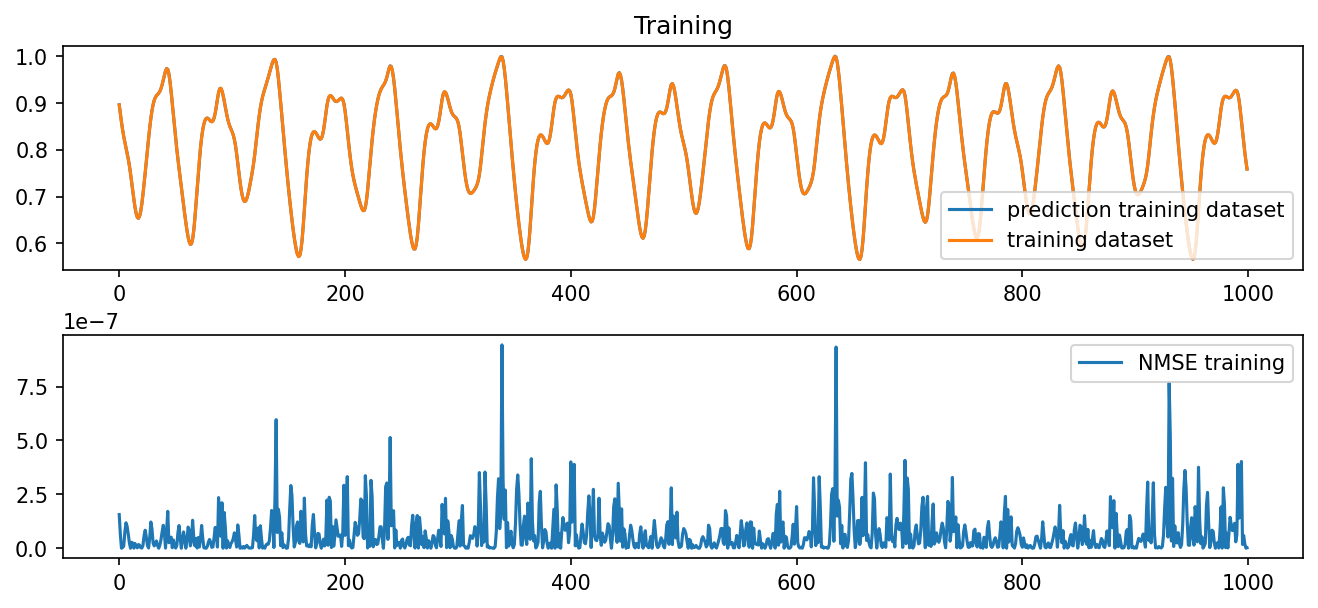

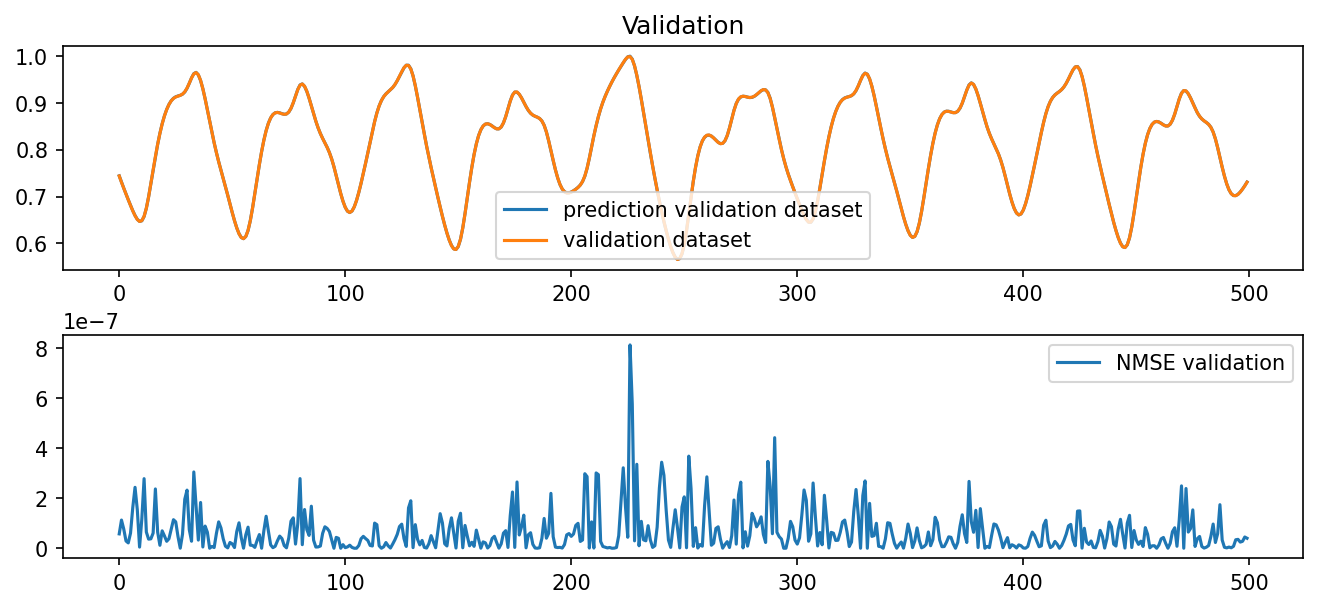

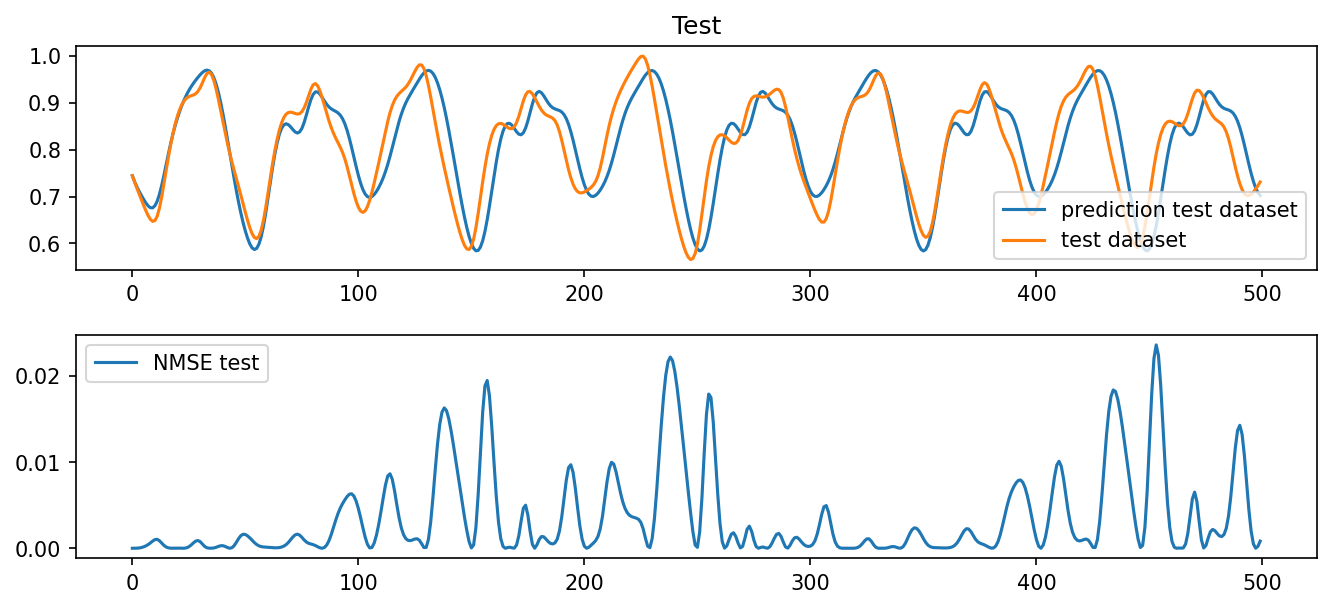

In [13]:
run_mg()

In [ ]:
# initialise esn
esn_sin1 = loukas_esn.Esn(data_sin1, r, a, b, inodes, onodes, ttr, twash, N, s)
# esn_sin3 = loukas_esn.Esn(data_sin3, r, a, b, inodes, onodes, ttr, twash, N, s)
# esn_mg = loukas_esn.Esn(data_mg, r, a, b, inodes, onodes, ttr, twash, N, s)
esn_sin1.plot_static_properties()
plt.colorbar()

In [ ]:
esn_sin1.train()
esn_sin1.get_all()

In [ ]:
def run_sin1():
    # initialise
    esn_sin1 = loukas_esn.Esn(data_sin1, r, a, b, inodes, onodes, ttr, twash, N, s)
    # run
    esn_sin1.train()
    print("nmse train: {}".format(esn_sin1.nmse_train))
    esn_sin1.validate(val_time=500)
    print("nmse val: {}".format(esn_sin1.nmse_val))
    esn_sin1.test(test_time=500)
    print("nmse test: {}".format(esn_sin1.nmse_test))
    # plot
    esn_sin1.plot_training()
    #plt.savefig(save_dir + 'sin1/sin1_Ttrain'+str(ttr)+'_N'+str(N)+'_training'+'.png')
    esn_sin1.plot_validation()
    #plt.savefig(save_dir + "sin1/sin1_Ttrain"+str(ttr)+"_N"+str(N)+"_validation"+'.png')
    esn_sin1.plot_test()
    #plt.savefig(save_dir + "sin1/sin1_Ttrain"+str(ttr)+"_N"+str(N)+"_testing"+'.png')

In [ ]:
def run_sin3():
    # initialise
    esn_sin3 = loukas_esn.Esn(data_sin3, r, a, b, inodes, onodes, ttr, twash, N, s)
    # run
    esn_sin3.train()
    print("nmse train: {}".format(esn_sin3.nmse_train))
    esn_sin3.validate(val_time=500)
    print("nmse val: {}".format(esn_sin3.nmse_val))
    esn_sin3.test(test_time=500)
    print("nmse test: {}".format(esn_sin3.nmse_test))
    # plot
    esn_sin3.plot_training()
    #plt.savefig(save_dir + 'sin3/sin3_Ttrain'+str(ttr)+'_N'+str(N)+'_training'+'.png')
    esn_sin3.plot_validation()
    #plt.savefig(save_dir + "sin3/sin3_Ttrain"+str(ttr)+"_N"+str(N)+"_validation"+'.png')
    esn_sin3.plot_test()
    #plt.savefig(save_dir + "sin3/sin3_Ttrain"+str(ttr)+"_N"+str(N)+"_testing"+'.png')

In [ ]:
def run_mg():
    # initialise
    esn_mg = loukas_esn.Esn(data_mg, r, a, b, inodes, onodes, ttr, twash, N, s, seed_init=5267)
    # run
    esn_mg.train()
    print("nmse train: {}".format(esn_mg.nmse_train))
    esn_mg.validate(val_time=500)
    print("nmse val: {}".format(esn_mg.nmse_val))
    esn_mg.test(test_time=500)
    print("nmse test: {}".format(esn_mg.nmse_test))
    # plot
    esn_mg.plot_training()
    #plt.savefig(save_dir + 'mg/mg_Ttrain'+str(ttr)+'_N'+str(N)+'_training'+'.png')
    esn_mg.plot_validation()
    #plt.savefig(save_dir + "mg/mg_Ttrain"+str(ttr)+"_N"+str(N)+"_validation"+'.png')
    esn_mg.plot_test()
    #plt.savefig(save_dir + "mg/mg_Ttrain"+str(ttr)+"_N"+str(N)+"_testing"+'.png')

In [ ]:
ttr = 2000      # training time
N = 2000         # reservoir size
s = 0.7         # sparsity

In [ ]:
run_sin1()

In [ ]:
run_sin3()

In [ ]:
run_mg()

In [ ]:
[data_mg[i+1]-data_mg[i] for i in range(len(data_mg)-1)]

In [ ]:
r = 1         # rhoscale
b = 1e-7        # beta
a = 0.70         # alpha
inodes = 1      # input nodes
onodes = 1      # output nodes
ttr = 500      # training time
twash = 200     # washout time
N = 5         # reservoir size
s = 0.7         # sparsity
save_dir = 'D:/Physics/Year3/Final_Year_Project/Dissertation/images/testing/' # export image path

In [ ]:
Ns = range(5,201)
train_nmse = []
val_nmse = []
test_nmse = []
for n in Ns:
    esn_sin3 = loukas_esn.Esn(data_sin3, r, a, b, inodes, onodes, ttr, twash, n, s)
    esn_sin3.train()
    train_nmse.append(esn_sin3.nmse_train)
    esn_sin3.validate(val_time=500)
    val_nmse.append(esn_sin3.nmse_val)
    esn_sin3.test(test_time=500)
    test_nmse.append(esn_sin3.nmse_test)
    #print(n)

In [ ]:
sizes = np.linspace(5,1500,200)
Ns = [int(k) for k in sizes]
train_nmse = []
val_nmse = []
test_nmse = []
for n in Ns:
    esn_mg = loukas_esn.Esn(data_mg, r, a, b, inodes, onodes, ttr, twash, n, s, seed_init=42069)
    esn_mg.train()
    train_nmse.append(esn_mg.nmse_train)
    esn_mg.validate(val_time=500)
    val_nmse.append(esn_mg.nmse_val)
    esn_mg.test(test_time=500)
    test_nmse.append(esn_mg.nmse_test)

In [ ]:
sizes = np.linspace(5,1500,200)
Ns = [int(k) for k in sizes]
#Ns

In [ ]:
#train_nmse

In [ ]:
plt.scatter(Ns,test_nmse,s=5,label="MG series")
plt.xlabel("N")
plt.ylabel("test nmse")
plt.legend()
plt.show()

In [ ]:
plt.scatter(Ns[3:],val_nmse[3:],s=5,label="MG series")
plt.xlabel("N")
plt.ylabel("validation nmse")
plt.legend()
plt.show()

In [ ]:
plt.scatter(Ns[3:],train_nmse[3:],s=5,label="MG series")
plt.xlabel("N")
plt.ylabel("training nmse")
plt.legend()
plt.show()

In [ ]:
rows = [["N","train nmse","val nmse","test nmse"]]
for i in range(len(train_nmse)):
    rows.append([str(Ns[i]),str(train_nmse[i]),str(val_nmse[i]),str(test_nmse[i])])

In [ ]:
np.savetxt("mg_Ns_ttr500.csv", 
           rows,
           delimiter =", ", 
           fmt ='% s')

In [ ]:
trnm = []
vlnm = []
tsnm = []
for l in rows[1:]:
    trnm.append(str(l[1]))
    vlnm.append(str(l[2]))
    tsnm.append(str(l[3]))

In [ ]:
textfile = open("mg_testdifference_ttr500-1000.txt", "w")
for element in test_dif:
    textfile.write(str(element) + "\n")
textfile.close()

In [ ]:
trnm1000 = trnm
vlnm1000 = vlnm
tsnm1000 = tsnm

In [ ]:
trnm500 = train_nmse
vlnm500 = val_nmse
tsnm500 = test_nmse

In [ ]:
test_dif = []
for i in range(len(tsnm1000)):
    test_dif.append(float(tsnm500[i])-float(tsnm1000[i]))

In [ ]:
plt.scatter(Ns,test_dif,s=5,label="MG series")
plt.xlabel("N")
plt.ylabel("test(Ttr=500) - test(Ttr=1000)")
plt.axhline(0,0,1500, color="black", linewidth=0.8)
plt.legend()
plt.show()

In [ ]:
better1000 = []
better500 = []
for t in test_dif:
    if t>0:
        better1000.append(t)
    else:
        better500.append(t)

In [ ]:
len(better1000)

In [ ]:
len(better500)

In [ ]:
len(better1000)/len(better500)

In [ ]:
len(better1000)/len(test_dif)

In [ ]:
f = open("testdif.txt", "r")
testd = f.read().split()
difs = []
for e in testd:
    difs.append(float(e))

In [ ]:
better = []
worse = []
for d in difs[100:]:
    if d>0:
        better.append(d)
    else:
        worse.append(d)

In [ ]:
len(better)

In [ ]:
len(worse)

In [ ]:
r = 1.3         # rhoscale
a = 0.506896551724138         # alpha
b = 6.723357536499335e-08        # beta
inodes = 1      # input nodes
onodes = 1      # output nodes
ttr = 1000      # training time
twash = 200     # washout time
N = 500         # reservoir size
s = 0.7         # sparsity
save_dir = 'D:/Physics/Year3/Final_Year_Project/Dissertation/images/testing/' # export image path

In [ ]:
esn_mg = loukas_esn.Esn(data_mg, r, a, b, inodes, onodes, ttr, twash, N, s, seed_init=5267)
# run
esn_mg.train()
esn_mg.test(test_time=750)
print("nmse test: {}".format(esn_mg.nmse_test))
# plot
esn_mg.plot_test()
plt.savefig(save_dir + "optimization/mg_r"+str(r)+"_a"+str(a)+"_b"+str(b)+"_nmse"+str(esn_mg.nmse_test)+'.png')

In [ ]:
esn_mg.get_all()

In [ ]:
r = 0.9896551724137931         # rhoscale
a = 0.3         # alpha
b = 1e-7        # beta

In [ ]:
esn_sin3 = loukas_esn.Esn(data_sin3, r, a, b, inodes, onodes, ttr, twash, N, s, seed_init=5267)
# run
esn_sin3.train()
esn_sin3.test(test_time=1100)
print("nmse test: {}".format(esn_sin3.nmse_test))
# plot
esn_sin3.plot_test()
plt.savefig(save_dir + "optimization/sin3_r"+str(r)+"_a"+str(a)+"_b"+str(b)+"_nmse"+str(esn_sin3.nmse_test)+'.png')